In [1]:
import stem_module as sm
from transformers import AutoModel, AutoTokenizer, BertTokenizer
import random
import numpy as np
from itertools import permutations,combinations
import torch


# FastText

Completely unrelated words would have cos θ ≈ 0, and strong associates would have cos θ values between 0.4 and 1.0.

In [2]:
ft= sm.loadModel(r'cc.tr.300.bin') 

In [3]:
word_list= sm.getWordList("words2.txt") 

In [4]:
vectors = sm.get_word_vectors(word_list, ft)

In [5]:
word_distances = sm.cos_similarity_function(vectors)

In [6]:
res= sm.generate_one_list(ft,word_distances,word_list)
res=[]
i=0
while i<12:
    res.append(sm.generate_one_list(ft,word_distances,word_list,12))
    i=i+1
print(res)

[['payda', 'acele', 'çöküş', 'adapte', 'zakkum', 'çamaşır', 'punto', 'tahta', 'afiyet', 'süngü', 'abajur', 'mısra'], ['çalışkan', 'acele', 'teke', 'ağıl', 'külot', 'basamak', 'ağıt', 'pense', 'nakavt', 'avukat', 'bayi', 'hısım'], ['haydut', 'avare', 'kapüşon', 'zenginlik', 'aforoz', 'maytap', 'ibre', 'pomat', 'sezon', 'bayi', 'örnek', 'şiddetli'], ['yağcılık', 'gurur', 'monitör', 'zakkum', 'brüt', 'gizlilik', 'bayi', 'abaküs', 'karar', 'gram', 'kambur', 'mızrap'], ['teke', 'acele', 'acılık', 'çekiç', 'punto', 'ücra', 'ibare', 'medya', 'pomat', 'alıntı', 'patik', 'tiryaki'], ['fincan', 'cılık', 'vitrin', 'hekim', 'kopya', 'nakavt', 'radyum', 'zılgıt', 'harf', 'dipnot', 'tutku', 'suçlu'], ['acele', 'ebleh', 'giyim', 'kapüşon', 'punto', 'nakavt', 'içtenlik', 'bilgin', 'pomat', 'urgan', 'bagaj', 'zılgıt'], ['uyum', 'sakatlık', 'atlet', 'haber', 'afiyet', 'maytap', 'kuşku', 'pense', 'takas', 'memur', 'gezegen', 'afacan'], ['ağıl', 'peşinat', 'imza', 'yakınlık', 'çeyiz', 'forma', 'ücra', 'ac

In [7]:
len(res)

12

In [8]:
len(res[0])

12

In [9]:
sm.generate_similar_words(word_list,word_distances,12)

[['çanta',
  'vitrin',
  'kolye',
  'ayna',
  'tabure',
  'masa',
  'dolap',
  'mobilya',
  'yastık',
  'saksı',
  'lamba'],
 ['resim',
  'çömlek',
  'çekiç',
  'tahta',
  'kağıt',
  'ibrik',
  'marangoz',
  'kerpeten',
  'çubuk',
  'satranç',
  'matematik'],
 ['uyku',
  'açlık',
  'denge',
  'oynaş',
  'çılgınlık',
  'koşu',
  'afallama',
  'ağırlık',
  'tekme',
  'üşenme',
  'acıkma'],
 ['eleştiri',
  'rezalet',
  'sahtekarlık',
  'rakam',
  'tuhaflık',
  'çılgınlık',
  'fazlalık',
  'espri',
  'haksızlık',
  'ayıp',
  'yalan'],
 ['hekim',
  'kadın',
  'gaddar',
  'beceri',
  'mühendis',
  'marangoz',
  'pilot',
  'cesur',
  'nişancı',
  'gönüllü',
  'asker'],
 ['hata',
  'davet',
  'aciliyet',
  'itiraz',
  'doğru',
  'titiz',
  'karar',
  'ihmal',
  'çabuk',
  'ısrar',
  'telaş'],
 ['hekim',
  'fuar',
  'rehber',
  'lokanta',
  'tekne',
  'liman',
  'gemi',
  'otel',
  'seyahat',
  'bayi',
  'turizm'],
 ['tatlı',
  'ağrı',
  'afallama',
  'bunaltı',
  'yorgunluk',
  'yemek',
  'aba

# fastText-CRP (semantic-CRP)

for instance we have a study list with 12 item but the subject recall some of them (but not all)

- calculate cos_u from each successfully recalled words and rank them.
- we first need to discretize the cosine similarity values into 100 bins of equal width. We can do this by dividing the range of cosine similarity values into 100 intervals of width. 
- subjects are more likely to make transitions to words with a higher value of cos u relative to the just-recalled word.
- we take actual and possible counts to find CRP (Actual/Possible Count) [https://memory.psych.upenn.edu/CRP_Tutorial]

Note: it is a single-trial example


In [30]:
# for a list taken randomly from created before:
# I print random number to find possible transitions.
items_recalled=[]
rand_num=random.randint(0, 12)
print(rand_num)
rand_list= res[rand_num]

for i in range(8):
    rand_num=random.randint(0, 11)
    if i in items_recalled:
        continue
    elif(len(items_recalled)==8):
        break
    else:
        items_recalled.append(rand_list[rand_num])

items_recalled= set(items_recalled)

6


In [31]:
items_recalled= list(items_recalled)

In [32]:
res[6]

['acele',
 'ebleh',
 'giyim',
 'kapüşon',
 'punto',
 'nakavt',
 'içtenlik',
 'bilgin',
 'pomat',
 'urgan',
 'bagaj',
 'zılgıt']

In [33]:
items_recalled #1st to last recalled order

['giyim', 'nakavt', 'pomat', 'bilgin', 'içtenlik', 'urgan', 'zılgıt']

In [34]:
diag_actual= sm.show_diagnosis(ft,items_recalled,True) # successively recalled words.
diag_actual

[('giyim', 'nakavt', -0.07668661),
 ('pomat', 'içtenlik', 0.006782671),
 ('bilgin', 'zılgıt', 0.01180878),
 ('nakavt', 'pomat', 0.033294316),
 ('bilgin', 'urgan', 0.043776378),
 ('nakavt', 'içtenlik', 0.07570966),
 ('nakavt', 'bilgin', 0.07796895),
 ('nakavt', 'urgan', 0.07894573),
 ('giyim', 'bilgin', 0.08179373),
 ('pomat', 'bilgin', 0.08807101),
 ('içtenlik', 'urgan', 0.091323234),
 ('pomat', 'zılgıt', 0.09645102),
 ('giyim', 'urgan', 0.09721384),
 ('giyim', 'içtenlik', 0.10004407),
 ('giyim', 'pomat', 0.11945545),
 ('nakavt', 'zılgıt', 0.12856093),
 ('giyim', 'zılgıt', 0.14622803),
 ('içtenlik', 'zılgıt', 0.15886676),
 ('bilgin', 'içtenlik', 0.16511506),
 ('pomat', 'urgan', 0.20467885),
 ('urgan', 'zılgıt', 0.2688977)]

In [35]:
diag_possible= sm.show_diagnosis(ft,res[3],True)
diag_possible #possible transitions

[('gizlilik', 'abaküs', -0.101030484),
 ('zakkum', 'brüt', -0.0792106),
 ('gurur', 'abaküs', -0.011068874),
 ('monitör', 'zakkum', -0.0034084744),
 ('zakkum', 'gizlilik', 0.009897995),
 ('gizlilik', 'bayi', 0.011588324),
 ('yağcılık', 'gram', 0.020252071),
 ('yağcılık', 'karar', 0.022714607),
 ('abaküs', 'karar', 0.02896498),
 ('gurur', 'monitör', 0.030514767),
 ('gurur', 'bayi', 0.031726014),
 ('gurur', 'zakkum', 0.038696043),
 ('bayi', 'mızrap', 0.040149897),
 ('brüt', 'abaküs', 0.051472012),
 ('karar', 'mızrap', 0.052419055),
 ('zakkum', 'karar', 0.053734828),
 ('brüt', 'mızrap', 0.053796005),
 ('gurur', 'mızrap', 0.059031982),
 ('zakkum', 'gram', 0.059402898),
 ('gizlilik', 'mızrap', 0.05952939),
 ('yağcılık', 'brüt', 0.06359203),
 ('gurur', 'brüt', 0.068798386),
 ('zakkum', 'bayi', 0.06939175),
 ('bayi', 'kambur', 0.0726403),
 ('karar', 'kambur', 0.073143214),
 ('yağcılık', 'abaküs', 0.0813018),
 ('zakkum', 'abaküs', 0.08175803),
 ('yağcılık', 'monitör', 0.082396),
 ('gram', 'kamb

In [36]:
len(diag_actual)

21

In [37]:
# dividing the range of cosine similarity values  into 100 intervals
def define_bins(diag_):
    first= diag_[0][2]
    last= diag_[-1][2]
    width= (last - first)/100
    # Create a dictionary to store the values to bins
    bin_discrete = {}
    counter=0
    # Use a for loop to create 100 variables and assign values
    for i in range(1, 100):
        bin_discrete[f'Bin{i}'] = (first+width*i,first+width*(i+1),counter)
    bin_discrete["Bin0"]= (first,first+width,counter)
    return bin_discrete

In [66]:
bin_discrete= define_bins(diag_actual)
bin_discrete 

{'Bin1': (-0.07323076993227005, -0.06977492660284042, 0),
 'Bin2': (-0.06977492660284042, -0.0663190832734108, 0),
 'Bin3': (-0.0663190832734108, -0.06286323994398117, 0),
 'Bin4': (-0.06286323994398117, -0.05940739661455154, 0),
 'Bin5': (-0.05940739661455154, -0.05595155328512191, 0),
 'Bin6': (-0.05595155328512191, -0.05249570995569229, 0),
 'Bin7': (-0.05249570995569229, -0.04903986662626267, 0),
 'Bin8': (-0.04903986662626267, -0.04558402329683304, 0),
 'Bin9': (-0.04558402329683304, -0.04212817996740341, 0),
 'Bin10': (-0.04212817996740341, -0.038672336637973787, 0),
 'Bin11': (-0.038672336637973787, -0.03521649330854416, 0),
 'Bin12': (-0.03521649330854416, -0.031760649979114534, 0),
 'Bin13': (-0.031760649979114534, -0.028304806649684905, 0),
 'Bin14': (-0.028304806649684905, -0.024848963320255282, 0),
 'Bin15': (-0.024848963320255282, -0.021393119990825653, 0),
 'Bin16': (-0.021393119990825653, -0.017937276661396023, 0),
 'Bin17': (-0.017937276661396023, -0.0144814333319664, 0

In [39]:
#compare and assign values to bins
# Value to check
def compare_and_assign_value(value_to_check,bin_discrete,show_results= False):
    # Iterate through the bins and check if the value is within the range
    in_bin = None  # Initialize a variable to store the bin where the value is found

    for bin_name, (min_value, max_value,counter) in bin_discrete.items():
        if min_value <= value_to_check <= max_value:
            in_bin = bin_name
            bin_discrete[bin_name] = (min_value, max_value, counter + 1)
            break  # Exit the loop when the value is found in a bin

    # Check the result
    if in_bin:
        print(f"The value {value_to_check} is in {in_bin} .") #and count: {counter}
    else:
        print(f"The value {value_to_check} is not in any bin.")
    return (value_to_check,in_bin)



In [40]:
#actual transitions
result=[]
for i in range(len(diag_actual)):
    result.append(compare_and_assign_value(diag_actual[i][2],bin_discrete,show_results= False))


The value -0.07668661326169968 is in Bin0 .
The value 0.006782670971006155 is in Bin24 .
The value 0.011808780021965504 is in Bin25 .
The value 0.03329431638121605 is in Bin31 .
The value 0.04377637803554535 is in Bin34 .
The value 0.07570966333150864 is in Bin44 .
The value 0.07796894758939743 is in Bin44 .
The value 0.07894573360681534 is in Bin45 .
The value 0.08179373294115067 is in Bin45 .
The value 0.08807101100683212 is in Bin47 .
The value 0.09132323414087296 is in Bin48 .
The value 0.09645102173089981 is in Bin50 .
The value 0.09721384197473526 is in Bin50 .
The value 0.10004407167434692 is in Bin51 .
The value 0.11945544928312302 is in Bin56 .
The value 0.12856093049049377 is in Bin59 .
The value 0.14622803032398224 is in Bin64 .
The value 0.1588667631149292 is in Bin68 .
The value 0.16511505842208862 is in Bin69 .
The value 0.20467884838581085 is in Bin81 .
The value 0.2688977122306824 is in Bin99 .


In [21]:
result #actual transitions results

[(-0.0034084744, 'Bin0'),
 (0.020252071, 'Bin11'),
 (0.059402898, 'Bin30'),
 (0.06939175, 'Bin34'),
 (0.0726403, 'Bin36'),
 (0.0813018, 'Bin40'),
 (0.08175803, 'Bin40'),
 (0.082396, 'Bin41'),
 (0.082705416, 'Bin41'),
 (0.086640656, 'Bin43'),
 (0.08880135, 'Bin44'),
 (0.09571375, 'Bin47'),
 (0.107525565, 'Bin53'),
 (0.1097386, 'Bin54'),
 (0.11887043, 'Bin58'),
 (0.13107759, 'Bin64'),
 (0.13723442, 'Bin67'),
 (0.13878562, 'Bin68'),
 (0.15560648, 'Bin76'),
 (0.1846177, 'Bin90'),
 (0.20494126, 'Bin99')]

# fastText-CRL (semantic-CRL)

- The conditional response latency as a function of mean LSA cos u for each bin
- inspects shows the mean inter-response time (IRT) between successive recalls of the bin of the cos u distribution
- LSA cos u also affects IRTs (inter-response-times) in free recall. (so does fasttext & BERT)
- IRTs are shorter when the successively recalled words are similar (i.e., have high cos u).
- subjects are more likely to recall items that are semantically related to the just-recalled item

Note: it is a single-trial example

In [43]:
items_recalled

['giyim', 'nakavt', 'pomat', 'bilgin', 'içtenlik', 'urgan', 'zılgıt']

In [42]:
diag_actual

[('giyim', 'nakavt', -0.07668661),
 ('pomat', 'içtenlik', 0.006782671),
 ('bilgin', 'zılgıt', 0.01180878),
 ('nakavt', 'pomat', 0.033294316),
 ('bilgin', 'urgan', 0.043776378),
 ('nakavt', 'içtenlik', 0.07570966),
 ('nakavt', 'bilgin', 0.07796895),
 ('nakavt', 'urgan', 0.07894573),
 ('giyim', 'bilgin', 0.08179373),
 ('pomat', 'bilgin', 0.08807101),
 ('içtenlik', 'urgan', 0.091323234),
 ('pomat', 'zılgıt', 0.09645102),
 ('giyim', 'urgan', 0.09721384),
 ('giyim', 'içtenlik', 0.10004407),
 ('giyim', 'pomat', 0.11945545),
 ('nakavt', 'zılgıt', 0.12856093),
 ('giyim', 'zılgıt', 0.14622803),
 ('içtenlik', 'zılgıt', 0.15886676),
 ('bilgin', 'içtenlik', 0.16511506),
 ('pomat', 'urgan', 0.20467885),
 ('urgan', 'zılgıt', 0.2688977)]

In [44]:
bin_discrete

{'Bin1': (-0.07323076993227005, -0.06977492660284042, 0),
 'Bin2': (-0.06977492660284042, -0.0663190832734108, 0),
 'Bin3': (-0.0663190832734108, -0.06286323994398117, 0),
 'Bin4': (-0.06286323994398117, -0.05940739661455154, 0),
 'Bin5': (-0.05940739661455154, -0.05595155328512191, 0),
 'Bin6': (-0.05595155328512191, -0.05249570995569229, 0),
 'Bin7': (-0.05249570995569229, -0.04903986662626267, 0),
 'Bin8': (-0.04903986662626267, -0.04558402329683304, 0),
 'Bin9': (-0.04558402329683304, -0.04212817996740341, 0),
 'Bin10': (-0.04212817996740341, -0.038672336637973787, 0),
 'Bin11': (-0.038672336637973787, -0.03521649330854416, 0),
 'Bin12': (-0.03521649330854416, -0.031760649979114534, 0),
 'Bin13': (-0.031760649979114534, -0.028304806649684905, 0),
 'Bin14': (-0.028304806649684905, -0.024848963320255282, 0),
 'Bin15': (-0.024848963320255282, -0.021393119990825653, 0),
 'Bin16': (-0.021393119990825653, -0.017937276661396023, 0),
 'Bin17': (-0.017937276661396023, -0.0144814333319664, 0

In [45]:
result

[(-0.07668661, 'Bin0'),
 (0.006782671, 'Bin24'),
 (0.01180878, 'Bin25'),
 (0.033294316, 'Bin31'),
 (0.043776378, 'Bin34'),
 (0.07570966, 'Bin44'),
 (0.07796895, 'Bin44'),
 (0.07894573, 'Bin45'),
 (0.08179373, 'Bin45'),
 (0.08807101, 'Bin47'),
 (0.091323234, 'Bin48'),
 (0.09645102, 'Bin50'),
 (0.09721384, 'Bin50'),
 (0.10004407, 'Bin51'),
 (0.11945545, 'Bin56'),
 (0.12856093, 'Bin59'),
 (0.14622803, 'Bin64'),
 (0.15886676, 'Bin68'),
 (0.16511506, 'Bin69'),
 (0.20467885, 'Bin81'),
 (0.2688977, 'Bin99')]

In [76]:
len(result)

21

In [99]:
items=[]
for i,y in result:
    items.append(i)
items

[-0.07668661,
 0.006782671,
 0.01180878,
 0.033294316,
 0.043776378,
 0.07570966,
 0.07796895,
 0.07894573,
 0.08179373,
 0.08807101,
 0.091323234,
 0.09645102,
 0.09721384,
 0.10004407,
 0.11945545,
 0.12856093,
 0.14622803,
 0.15886676,
 0.16511506,
 0.20467885,
 0.2688977]

In [96]:
time=  np.random.randint(1, 11, len(result))
mean_IRTs = np.array(time)
mean_IRTs= np.sort(mean_IRTs)[::-1]
mean_IRTs

array([10, 10, 10, 10,  9,  7,  7,  7,  7,  6,  5,  5,  4,  3,  3,  3,  3,
        2,  2,  2,  1])

In [74]:
mean_IRTs

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  9,  9,  9,  9,  9,
        9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,  6,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,
        4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1])

In [75]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

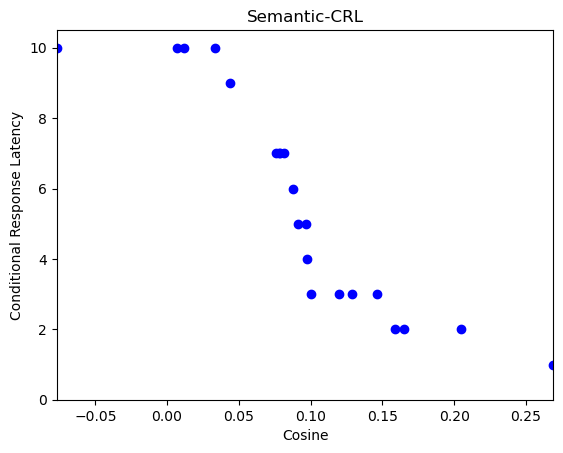

In [100]:
import matplotlib.pyplot as plt

# Generate random data for the x-axis (e.g., 8 data points)


# Create a dot plot
plt.scatter(items, mean_IRTs, marker='o', color='b')

plt.ylim(0, 10.5)
plt.xlim(bin_discrete['Bin0'][0], bin_discrete['Bin99'][1])


# Add labels and title
plt.xlabel('Cosine')
plt.ylabel('Conditional Response Latency')
plt.title('Semantic-CRL')

# Show the plot
plt.show()

# BERT MODELİ

Turkish pre-trained model: https://huggingface.co/dbmdz/bert-base-turkish-cased

In [14]:
bert_model = AutoModel.from_pretrained("dbmdz/bert-base-turkish-cased")


Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [101]:
vector1= sm.calculate_bert_embeddings_model(word_list)


Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [102]:
vector1

array([[-0.3115232 ,  1.6038265 ,  0.04310273, ..., -0.3726262 ,
         0.17596519,  0.75714487],
       [-0.2882595 ,  1.1862375 ,  0.05102614, ..., -0.52803814,
        -0.3294381 ,  0.474016  ],
       [-0.37355462,  1.409199  ,  0.13654795, ..., -0.35431677,
         0.07356647,  0.5828468 ],
       ...,
       [-0.31669512,  1.3045876 ,  0.04253878, ..., -0.69669235,
        -0.1429939 ,  0.24002017],
       [-0.47123593,  1.1860896 ,  0.02589463, ..., -0.26325992,
         0.08572736,  0.3614285 ],
       [-0.5151827 ,  1.2595109 ,  0.0984696 , ..., -0.33785206,
         0.2257942 ,  0.26217818]], dtype=float32)

In [103]:
word_distances1 = sm.cos_similarity_function(vector1)

In [104]:
sm.generate_similar_words(word_list,word_distances1,12)

[['sütlaç',
  'takoz',
  'zıpkın',
  'tabure',
  'sülün',
  'üfürük',
  'gurultu',
  'kuzgun',
  'zakkum',
  'abaküs',
  'abanma'],
 ['ütopya',
  'çöplük',
  'espri',
  'abanma',
  'tabure',
  'sülün',
  'otoban',
  'kuzgun',
  'üfürük',
  'zıpkın',
  'abajur'],
 ['zıpkın',
  'haydut',
  'pire',
  'tuhaflık',
  'zakkum',
  'kuzgun',
  'üfürük',
  'sülün',
  'gurultu',
  'abaküs',
  'abajur'],
 ['pislik',
  'bilezik',
  'hayta',
  'kafiye',
  'sıkışık',
  'duygulu',
  'çirkinlik',
  'soytarı',
  'sahtekarlık',
  'dipnot',
  'zalimlik'],
 ['işaret',
  'adayış',
  'öncülük',
  'paslı',
  'onur',
  'şalter',
  'ibare',
  'şafak',
  'müşfik',
  'çeyiz',
  'avare'],
 ['mafya',
  'diken',
  'içim',
  'deli',
  'tahta',
  'hayret',
  'ideal',
  'heyecan',
  'patron',
  'sıkıntı',
  'telaş'],
 ['akran',
  'takım',
  'spor',
  'çelenk',
  'ulaşım',
  'cenin',
  'pilot',
  'turizm',
  'bitki',
  'kaza',
  'tekne'],
 ['viski',
  'barut',
  'aforoz',
  'palto',
  'yağcılık',
  'yaşlılık',
  'afyon'